In [17]:
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
import json

In [3]:
df = pd.read_csv("./dogs_n_cats.csv")
df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [4]:
print(df.shape)

(1000, 6)


In [5]:
df.groupby('Вид').aggregate(['count'])

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
,count,count,count,count,count
Вид,,,,,
котик,500,500,500,500,500
собачка,500,500,500,500,500


In [6]:
df.isnull().sum()

Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид                   0
dtype: int64

In [7]:
df_chosen = ['Длина', 'Высота', 'Шерстист', 'Гавкает','Лазает по деревьям']

x = df[df_chosen]

x.head()


,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0


In [8]:
df_chosen_y = ['Вид']

y = df[df_chosen_y]

y.head()

,Вид
0,собачка
1,собачка
2,собачка
3,собачка
4,собачка


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

In [10]:
x_train.shape

(800, 5)

In [11]:
x_test.shape

(200, 5)

In [12]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [13]:
clf = clf.fit(x_train, y_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
clf.score(x_train, y_train)

1.0

In [15]:
y_predicted = clf.predict(x_test)

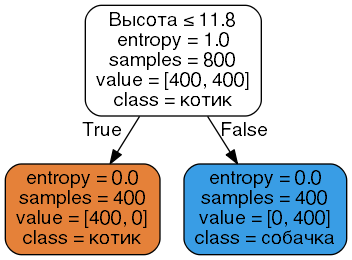

In [16]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = df_chosen, class_names=['котик','собачка'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('dogs_n_cats.png')

Image(graph.create_png())

In [18]:
with open('./dataset_209691_15.json', 'r') as f:
    data = json.load(f)


In [21]:
df_2 = pd.DataFrame(data)
df_2.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,25,30.0,1,1,0
1,34,40.8,1,1,0
10,23,27.6,1,1,0
11,23,27.6,1,1,0
12,20,24.0,1,0,0


In [26]:
y2 = clf.predict(df_2)